In [1]:
from keras.datasets import imdb
(train_data,train_labels),(test_data,test_labels) = imdb.load_data(num_words = 10000)

17473536/17464789 [==============================] - 6s 0us/step


In [3]:
from keras import models,layers
import tensorflow as tf

In [8]:
import numpy as np 
def vectorize_sequence(sequence,dimension = 10000):
    results = np.zeros((len(sequence),dimension))
    for i ,sequence in enumerate(sequence):
        results[i,sequence] = 1
    return results
x_train = vectorize_sequence(train_data)
x_test = vectorize_sequence(test_data)
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [9]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [10]:
model = models.Sequential()
model.add(layers.Dense(16,activation = 'relu',input_shape = (10000,)))
model.add(layers.Dense(16,activation = 'relu'))
model.add(layers.Dense(1,activation = 'sigmoid'))

In [11]:
from keras import metrics 
from keras import losses
model.compile(optimizer = tf.keras.optimizers.RMSprop(learning_rate = 0.01),loss = losses.binary_crossentropy,metrics = [metrics.binary_accuracy])

In [12]:
history = model.fit(partial_x_train,partial_y_train,epochs = 20,batch_size = 512,validation_data = (x_val,y_val))

Epoch 1/20
30/30 [==============================] - 1s 25ms/step - loss: 0.5778 - binary_accuracy: 0.7581 - val_loss: 0.3083 - val_binary_accuracy: 0.8792
Epoch 2/20
30/30 [==============================] - 0s 14ms/step - loss: 0.2790 - binary_accuracy: 0.8887 - val_loss: 0.2745 - val_binary_accuracy: 0.8904
Epoch 3/20
30/30 [==============================] - 0s 14ms/step - loss: 0.2032 - binary_accuracy: 0.9163 - val_loss: 0.3002 - val_binary_accuracy: 0.8725
Epoch 4/20
30/30 [==============================] - 0s 15ms/step - loss: 0.1485 - binary_accuracy: 0.9415 - val_loss: 0.3324 - val_binary_accuracy: 0.8752
Epoch 5/20
30/30 [==============================] - 0s 16ms/step - loss: 0.1308 - binary_accuracy: 0.9456 - val_loss: 0.3164 - val_binary_accuracy: 0.8813
Epoch 6/20
30/30 [==============================] - 0s 16ms/step - loss: 0.0897 - binary_accuracy: 0.9663 - val_loss: 0.3770 - val_binary_accuracy: 0.8820
Epoch 7/20
30/30 [==============================] - 0s 14ms/step - los

In [13]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])

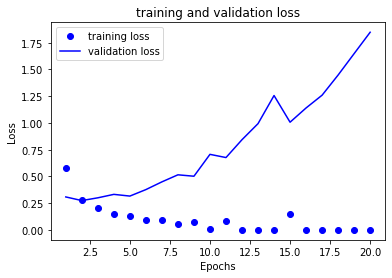

In [15]:
import matplotlib.pyplot as plt
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc = history_dict['binary_accuracy']
epochs = range(1,len(acc)+1)
plt.plot(epochs,loss_values,'bo',label = 'training loss')
plt.plot(epochs,val_loss_values,'b',label = 'validation loss')
plt.title('training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()